In [4]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = 'dev_in.csv'

df = pd.read_csv(data, header=None, sep=',')

In [6]:
# view dimensions of dataset

df.shape

(50001, 129)

In [7]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
1,1539162000,-40.35,-9.88,11.0,10,tropical,-843.0,31.78248998153052,10.07071428571432,765.6312283014016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.505035400390625,2.6475769042968977,2.0,2.0
2,1545006600,53.421299,-6.270070000000004,4.0,10,mild temperate,67.0,-59.69152145231892,7.005000000000032,752.8976150963312,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.4000244140625,1.2499938964843975,0.0,0.0
3,1540094400,-19.7577,63.361,26.0,10,dry,6.0,35.250889085578635,23.32714285714289,763.1150163007375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100006103515625,21.05001220703128,-1.0,1.0
4,1552611600,35.245899,47.009201,5.0,10,mild temperate,1390.0,-23.755614985282445,3.1092857142857446,609.4193331163475,...,1.69672,5.1653,0.0,4.8750000000000006e-05,0.0,0.0,-1.5,-0.3499816894531022,-12.0,81.0


In [8]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128],
           dtype='int64', length=129)

In [9]:
header_row = 0
df.columns = df.iloc[header_row]
df = df.tail(-1)

In [10]:
col_list = list(df.columns)
x, y = col_list.index('climate'), col_list.index('gfs_total_clouds_cover_low_next')
col_list[y], col_list[x] = col_list[x], col_list[y]
df = df[col_list]

In [11]:
df.columns

Index(['fact_time', 'fact_latitude', 'fact_longitude', 'fact_temperature',
       'fact_cwsm_class', 'gfs_total_clouds_cover_low_next',
       'topography_bathymetry', 'sun_elevation', 'climate_temperature',
       'climate_pressure',
       ...
       'cmc_0_1_66_0_grad', 'cmc_0_1_66_0_next', 'cmc_0_1_67_0_grad',
       'cmc_0_1_67_0_next', 'cmc_0_1_68_0_grad', 'cmc_0_1_68_0_next',
       'gfs_2m_dewpoint_grad', 'gfs_2m_dewpoint_next',
       'gfs_total_clouds_cover_low_grad', 'climate'],
      dtype='object', name=0, length=129)

In [12]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 1 to 50000
Columns: 129 entries, fact_time to climate
dtypes: object(129)
memory usage: 49.2+ MB


In [13]:
# display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']

In [14]:
# print percentage of missing values in the categorical variables in data

df[categorical].isnull().mean()

0
fact_time                          0.00000
fact_latitude                      0.00000
fact_longitude                     0.00000
fact_temperature                   0.00000
fact_cwsm_class                    0.00000
                                    ...   
cmc_0_1_68_0_next                  0.00062
gfs_2m_dewpoint_grad               0.00014
gfs_2m_dewpoint_next               0.00008
gfs_total_clouds_cover_low_grad    0.00014
climate                            0.00000
Length: 129, dtype: float64

In [15]:
# print categorical variables with missing data

for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

gfs_total_clouds_cover_low_next 8e-05
cmc_0_0_0_1000 0.00062
cmc_0_0_0_2_grad 0.00062
cmc_0_0_0_2_interpolated 0.00062
cmc_0_0_0_2_next 0.00062
cmc_0_0_0_2 0.00062
cmc_0_0_0_500 0.00062
cmc_0_0_0_700 0.00062
cmc_0_0_0_850 0.00062
cmc_0_0_0_925 0.00062
cmc_0_0_6_2 0.00062
cmc_0_0_7_1000 0.00062
cmc_0_0_7_2 0.00062
cmc_0_0_7_500 0.00062
cmc_0_0_7_700 0.00062
cmc_0_0_7_850 0.00062
cmc_0_0_7_925 0.00062
cmc_0_1_0_0 0.00062
cmc_0_1_11_0 0.00062
cmc_0_1_65_0 0.00062
cmc_0_1_66_0 0.00062
cmc_0_1_67_0 0.00062
cmc_0_1_68_0 0.00062
cmc_0_1_7_0 0.00062
cmc_0_2_2_10 0.00062
cmc_0_2_2_1000 0.00062
cmc_0_2_2_500 0.00062
cmc_0_2_2_700 0.00062
cmc_0_2_2_850 0.00062
cmc_0_2_2_925 0.00062
cmc_0_2_3_10 0.00062
cmc_0_2_3_1000 0.00062
cmc_0_2_3_500 0.00062
cmc_0_2_3_700 0.00062
cmc_0_2_3_850 0.00062
cmc_0_2_3_925 0.00062
cmc_0_3_0_0 0.00062
cmc_0_3_0_0_next 0.00062
cmc_0_3_1_0 0.00062
cmc_0_3_5_1000 0.00062
cmc_0_3_5_500 0.00062
cmc_0_3_5_700 0.00062
cmc_0_3_5_850 0.00062
cmc_0_3_5_925 0.00062
cmc_0_6_1_0 

In [16]:
# impute missing categorical variables with most frequent value

for col in categorical:
    if df[col].isnull().mean()>0:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [17]:
df.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,gfs_total_clouds_cover_low_next,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,climate
1,1539162000,-40.35,-9.88,11.0,10,2.0,-843.0,31.78248998153052,10.07071428571432,765.6312283014016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.505035400390625,2.6475769042968977,2.0,tropical
2,1545006600,53.421299,-6.270070000000004,4.0,10,0.0,67.0,-59.69152145231892,7.005000000000032,752.8976150963312,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.4000244140625,1.2499938964843975,0.0,mild temperate
3,1540094400,-19.7577,63.361,26.0,10,1.0,6.0,35.250889085578635,23.32714285714289,763.1150163007375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100006103515625,21.05001220703128,-1.0,dry
4,1552611600,35.245899,47.009201,5.0,10,81.0,1390.0,-23.755614985282445,3.1092857142857446,609.4193331163475,...,1.69672,5.1653,0.0,4.8750000000000006e-05,0.0,0.0,-1.5,-0.3499816894531022,-12.0,mild temperate
5,1545631200,26.633333,118.15,14.0,20,83.0,210.0,33.04043798862271,12.172142857142884,734.6780370001287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.102081298828125,11.513879394531273,-15.0,mild temperate


In [18]:
df.shape

(50000, 129)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df.columns[:128]
df[cols] = scaler.fit_transform(df[cols])

In [20]:
def cluster_1_label(alpha):
    if alpha == 0:
        return 'mild temperate'
    if alpha == 1:
        return 'dry'
    if alpha == 2:
        return 'tropical'

kmeans_model_1 = KMeans(n_clusters=3,random_state=123)
distances_1 = kmeans_model_1.fit_transform(df.iloc[:,0:128])
labels_1 = kmeans_model_1.labels_
print (labels_1)
df['cluster_1']=labels_1
df['cluster_1_label']=df['cluster_1'].apply(cluster_1_label)

[2 2 1 ... 2 0 1]


In [21]:
# true results / total results for accuracy
cluster_1_accuracy = len(df[df['climate']==df['cluster_1_label']])/len(df)
print('K=3 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))

K=3 KMeans -> 38.0560%


In [22]:
# identifying actual result to cluster mapping -> 
# not satisfactory as the error values are near to correct once
pd.crosstab(df['climate'],labels_1)

col_0,0,1,2
climate,,,
dry,4225,4186,2550
mild temperate,14818,7832,9748
tropical,61,6556,24


In [23]:
# changing the k value from 3 to 21 to get better accuracy
def cluster_2_label(alpha):
    if alpha in [2,5,3,7,8,9,10,11,14,16,17,18,19,20]:
        return 'mild temperate'
    if alpha in [0,1,4,6,13]:
        return 'dry'
    if alpha in [12,15]:
        return 'tropical'
kmeans_model_2 = KMeans(n_clusters=21,random_state=123)
distances_2 = kmeans_model_2.fit_transform(df.iloc[:,0:128])
labels_2 = kmeans_model_2.labels_
df['cluster_2']=labels_2
df['cluster_2_label']=df['cluster_2'].apply(cluster_2_label)

In [24]:
cluster_2_accuracy = len(df[df['climate']==df['cluster_2_label']])/len(df)
print('K=21 KMeans -> {0:.4f}%'.format(cluster_2_accuracy*100))

K=21 KMeans -> 68.9000%


<AxesSubplot:xlabel='climate'>

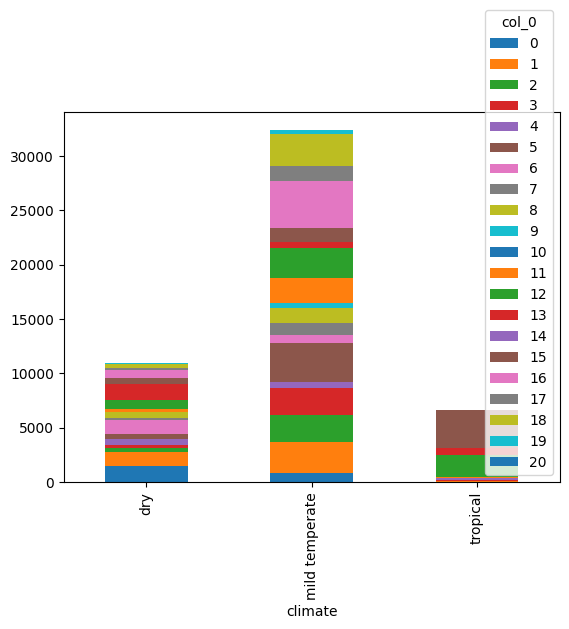

In [25]:
# again identifying but still rult not satisfactory
cross_tb = pd.crosstab(df['climate'],labels_2)
cross_tb.plot(kind="bar", stacked=True)
# cross_tb

In [26]:
# trying losgistic classification to check accuracy and for that 
# computing the actual_climate to determine through logistic classification
dummies = pd.get_dummies(df['climate'],prefix='actual_climate')
df = pd.concat([df,dummies],axis=1)
df.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,gfs_total_clouds_cover_low_next,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,climate,cluster_1,cluster_1_label,cluster_2,cluster_2_label,actual_climate_dry,actual_climate_mild temperate,actual_climate_tropical
1,-1.111992,-3.029339,0.121829,-0.400290,0.117478,-0.506114,-2.285486,0.896105,-0.558213,0.789094,...,-0.529164,0.113340,tropical,2,tropical,2,mild temperate,0,0,1
2,-0.043303,1.172737,0.168344,-1.079298,0.117478,-0.568584,-0.476893,-1.500677,-0.897923,0.494443,...,-0.668759,0.001706,mild temperate,2,tropical,17,mild temperate,0,1,0
3,-0.941502,-2.106558,1.065556,1.054726,0.117478,-0.537349,-0.598128,0.986984,0.910725,0.730870,...,1.308924,-0.054111,dry,1,dry,12,tropical,1,0,0
4,1.347277,0.358261,0.854859,-0.982297,0.117478,1.961444,2.152524,-0.559092,-1.329605,-2.825585,...,-0.828569,-0.668098,mild temperate,2,tropical,19,mild temperate,0,1,0
5,0.070906,-0.027685,1.771524,-0.109287,1.352347,2.023914,-0.192685,0.929066,-0.325355,0.072850,...,0.356428,-0.835550,mild temperate,0,mild temperate,11,mild temperate,0,1,0


In [27]:
# dividing in 3 models as per the algorithm
classifiers = ['mild temperate','dry','tropical']
models = {}
for mdl_idx in classifiers:
    lgr_model = LogisticRegression()
    lgr_model.fit(df.iloc[:,0:128],df['actual_climate_{}'.format(mdl_idx)])
    models[mdl_idx]=lgr_model
models

{'mild temperate': LogisticRegression(),
 'dry': LogisticRegression(),
 'tropical': LogisticRegression()}

In [28]:
# printing coefficients
coefs = {}
for mdl_k, mdl_v in models.items():
    coefs[mdl_k]=mdl_v.coef_
coefs

{'mild temperate': array([[ 0.04808549,  0.27374257, -0.09603292,  0.14163082, -0.03278461,
          0.09677927,  0.09370628,  0.10012696, -0.79330859, -0.38964003,
          0.20112923, -0.03113323,  0.08690957,  0.60706578,  0.61697206,
          0.75557833, -0.10225415, -0.33277077,  0.3583739 ,  0.91791525,
          0.43468755, -0.41714164, -0.10823053,  0.0436208 ,  0.14994332,
          0.04368587, -0.72215875, -0.16500799,  0.12464575,  0.00720075,
         -0.00762856,  0.00717609, -0.01664996, -0.20836633, -0.06517577,
         -0.01166496,  0.21128566,  0.2474651 ,  0.15422111,  0.09169442,
         -0.30401153, -0.10052636, -0.00829195, -0.04315667,  0.0558567 ,
         -0.16821948, -0.26879521,  1.16921859, -0.56489759,  1.01353836,
         -0.44886678, -0.44623319, -0.00162355,  0.04380267, -0.08334372,
          0.04764809,  0.03661857,  0.00802489,  0.59411222,  0.03243205,
         -0.02974841, -0.01132442, -0.02838306, -0.07374387, -0.01357429,
         -0.52343736

In [29]:
# printing probablity of the data to be in the class
lgr_probabilities = pd.DataFrame(columns=classifiers)
for mdl_key, mdl_model in models.items():
    lgr_probabilities[mdl_key] = mdl_model.predict_proba(df.iloc[:,0:128])[:,1]
lgr_probabilities.head()

,mild temperate,dry,tropical
0,0.928450,0.070930,4.512182e-03
1,0.743693,0.062098,1.993230e-02
2,0.486773,0.159952,3.410087e-01
3,0.660634,0.334772,6.463090e-08
4,0.786304,0.059484,4.043813e-02


In [30]:
predicted_climate = lgr_probabilities.idxmax(axis=1)
pred_spec = lgr_probabilities.max(axis=1)
pd.crosstab(df['climate'],predicted_climate)

col_0,dry,mild temperate,tropical
climate,,,
dry,1568,7825,1567
mild temperate,4910,22816,4672
tropical,978,4677,986


In [31]:
df.index = df.index = df.index - 1

In [32]:
predicted_climate.sort_index(inplace=True)
lgr_accuracy = len(df[df['climate']==predicted_climate].sort_index().sort_index(axis=0))/len(df)
print('Logistic Regression Accuracy - {0:.4f}%'.format(lgr_accuracy*100));

Logistic Regression Accuracy - 80.8560%
